## **Proyek Analisis Data : Bike Sharing Data Set**

*   Nama  : Shinta Arum Imaniyah
*   Email : shintaaa.arum@gmail.com
*   ID    : shintaarumimaniyah







## **Menentukan Pertanyaan**
1.   Apakah terdapat pola penyewaan sepeda berdasarkan hari kerja dan hari libur?
2.  Apakah terdapat tren penyewaan sepeda yang berubah dari tahun ke tahun?





## **Import Semua Packages/Library yang Digunakan**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Wrangling**

Gathering Data

In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'day.csv'

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assesing Data**

Menilai tabel day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


## **Cleaning Data**

Membersihkan tabel day_df

Missing Values

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Membersihkan tabel hour_df

Missing Values

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### **Exploratory Data Analysis (EDA)**

Menggabungkan day_df dan hour_df

In [ ]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Explore day_df

In [ ]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122,5108,6230
527,528,2012-06-11,2,1,6,0,1,1,2,0.720833,0.659721,0.587917,0.207713,1017,5647,6664
567,568,2012-07-21,3,1,7,0,6,0,3,0.595833,0.549912,0.865417,0.213300,1264,3195,4459
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,38,1129,1167
241,242,2011-08-30,3,0,8,0,2,1,1,0.639167,0.594704,0.548333,0.125008,775,4429,5204
500,501,2012-05-15,2,1,5,0,2,1,2,0.611667,0.576404,0.794583,0.147392,625,4490,5115
538,539,2012-06-22,3,1,6,0,5,1,1,0.777500,0.724121,0.573750,0.182842,964,4859,5823
470,471,2012-04-15,2,1,4,0,0,0,1,0.606667,0.573875,0.507917,0.225129,2846,4286,7132
181,182,2011-07-01,3,0,7,0,5,1,1,0.722500,0.652162,0.396250,0.102608,1246,4116,5362
560,561,2012-07-14,3,1,7,0,6,0,2,0.703333,0.666042,0.699167,0.143679,2355,4614,6969


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day_df.instant.is_unique

True

In [ ]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [ ]:
day_df.groupby(by="registered").instant.nunique().sort_values(ascending=False)

,instant
registered,
6248,3
1707,3
4841,3
3248,2
3413,2
...,...
3077,1
3084,1
3100,1


In [ ]:
day_df.groupby(by="dteday").instant.nunique().sort_values(ascending=False)

,instant
dteday,
2011-01-01,1
2012-04-25,1
2012-04-27,1
2012-04-28,1
2012-04-29,1
...,...
2011-09-03,1
2011-09-04,1
2011-09-05,1


Explore hour_df

In [ ]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7716,7717,2011-11-23,4,0,11,3,0,3,1,3,0.50,0.4848,0.94,0.3582,1,2,3
10397,10398,2012-03-14,1,1,3,8,0,3,1,1,0.44,0.4394,0.82,0.0000,34,628,662
11941,11942,2012-05-17,2,1,5,18,0,4,1,1,0.66,0.6212,0.27,0.1642,134,734,868
15282,15283,2012-10-03,4,1,10,23,0,3,1,2,0.66,0.6061,0.78,0.0000,21,199,220
12080,12081,2012-05-23,2,1,5,13,0,3,1,2,0.66,0.6212,0.74,0.1642,69,201,270
3234,3235,2011-05-19,2,0,5,16,0,4,1,1,0.58,0.5455,0.64,0.1940,55,247,302
16920,16921,2012-12-12,4,1,12,19,0,3,1,2,0.30,0.2879,0.56,0.2239,18,384,402
559,560,2011-01-25,1,0,1,12,0,2,1,2,0.26,0.2879,0.56,0.0896,21,85,106
9500,9501,2012-02-05,1,1,2,18,0,0,0,1,0.30,0.2879,0.52,0.2537,10,171,181
16762,16763,2012-12-06,4,1,12,5,0,4,1,1,0.22,0.2121,0.55,0.2836,0,32,32


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### **Visualization & Explanatory Analysis**

Pertanyaan 1 : Apakah terdapat pola penyewaan sepeda berdasarkan hari kerja dan hari libur?

In [ ]:
workingday_rentals_hour = hour_df.groupby('workingday')['cnt'].sum().reset_index()
workingday_rentals_hour['workingday'] = workingday_rentals_hour['workingday'].map({0: 'Holiday', 1: 'Working Day'})
workingday_rentals_hour

,workingday,cnt
0,Holiday,1000269
1,Working Day,2292410


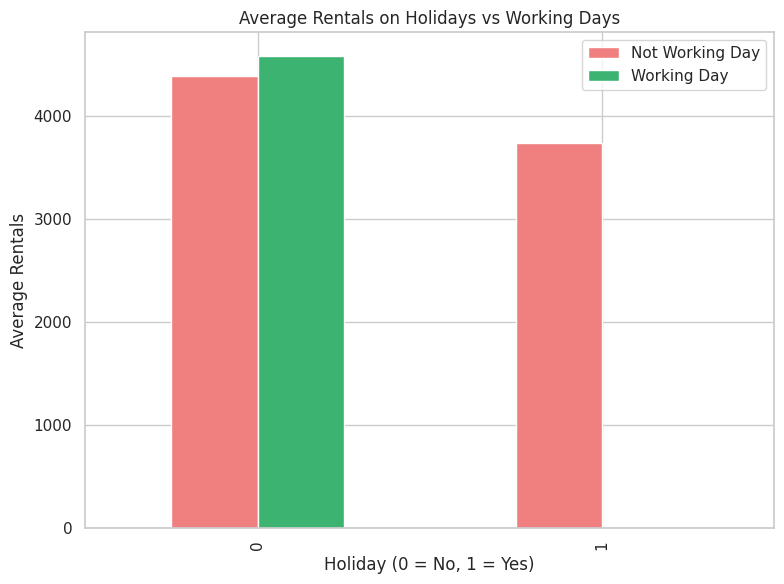

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

holiday_workingday = day_df.groupby(['holiday', 'workingday'])['cnt'].mean().unstack()

holiday_workingday.plot(kind='bar', ax=ax, color=['lightcoral', 'mediumseagreen'])
ax.set_title('Average Rentals on Holidays vs Working Days')
ax.set_ylabel('Average Rentals')
ax.set_xlabel('Holiday (0 = No, 1 = Yes)')
ax.legend(['Not Working Day', 'Working Day'])

plt.tight_layout()
plt.show()

Pertanyaan 2 : Apakah terdapat tren penyewaan sepeda yang berubah dari tahun ke tahun?


In [ ]:
day_df = pd.read_csv('day.csv')
day_df['year'] = day_df['yr'].map({0: 2011, 1: 2012})

yearly_rentals_day = day_df.groupby('year')['cnt'].sum().reset_index()

print(yearly_rentals_day)

   year      cnt
0  2011  1243103
1  2012  2049576


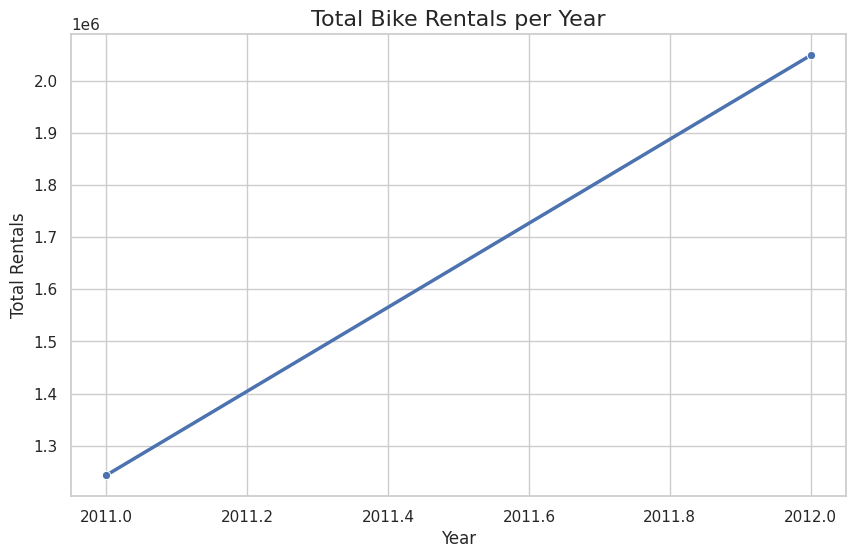

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr', y='cnt', data=yearly_rentals, marker='o', linewidth=2.5, color='b')

plt.title('Total Bike Rentals per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)


plt.grid(True)
plt.show()

## **Conclusion**

1.   Apakah terdapat pola penyewaan sepeda berdasarkan hari kerja dan hari libur?





pola yang terdapat pada hari kerja lebih tinggi , karena banyak orang menggunakan sepeda sebagai transportasi untuk bekerja. sedangkan pola hari libur lebih rendah, karena kemungkina sedikit aktivitas yang memperlukan sepede pada hari libur

2. Apakah terdapat tren penyewaan sepeda yang berubah dari tahun ke tahun?

Tahun 2011 memiliki jumlah penyewaan yang lebih rendah dibandingkan dengan tahun 2012.
Tahun 2012 mengalami peningkatan signifikan dalam total penyewaan sepeda dibandingkan dengan tahun sebelumnya.